In [2]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
def two_arr_clean(arr1, arr2):
    idx = np.logical_not(np.logical_or(np.isnan(arr1), np.isnan(arr2)))     
    arr1, arr2 = arr1[idx], arr2[idx]
    return arr1, arr2

In [ ]:
ncs = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/old/')
for fp in ncs.glob('*.sd.nc'):
    ds = xr.open_dataset(fp)
    # a = ds['int'].sel(band = 'VV') - ds['int'].sel(band = 'VV').mean()
    # ds['int']

In [1]:
for dir in ncs.joinpath('images').glob('*'):
    if dir.stem == 'tmp':
        continue
    int = xr.open_dataarray(next(dir.glob('*VV*int*.tiff')))
    # int = int.angle
    # dem = xr.open_dataarray(next(dir.glob('*VV*hgt*.tiff'))).data.ravel()
    # int, dem = two_arr_clean(int, dem)
    # plt.scatter(int, dem)
    # plt.show()

NameError: name 'ncs' is not defined

In [32]:
int

<xarray.DataArray 'band_data' (band: 1, y: 16306, x: 24942)>
[406704252 values with dtype=complex64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -116.3 -116.3 -116.3 ... -114.9 -114.9 -114.9
  * y            (y) float64 44.48 44.48 44.48 44.48 ... 43.57 43.57 43.57 43.57
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area

In [21]:
a = ds['int'].sel(band = 'VV') - ds['int'].sel(band = 'VV').mean()

In [22]:
a.quantile([0.05, 0.95])

<xarray.DataArray 'int' (quantile: 2)>
array([-1.76216619,  1.70762134])
Coordinates:
  * quantile  (quantile) float64 0.05 0.95

In [16]:
xr.apply_ufunc(np.rad2deg, ds['int'].sel(band = 'VV')).quantile([0.05, 0.95])

<xarray.DataArray 'int' (quantile: 2)>
array([-253.02836151,  -54.22418976])
Coordinates:
  * quantile  (quantile) float64 0.05 0.95

In [17]:
ds['int'].sel(band = 'VV').quantile([0.05, 0.95])

<xarray.DataArray 'int' (quantile: 2)>
array([-4.41617815, -0.94639069])
Coordinates:
  * quantile  (quantile) float64 0.05 0.95

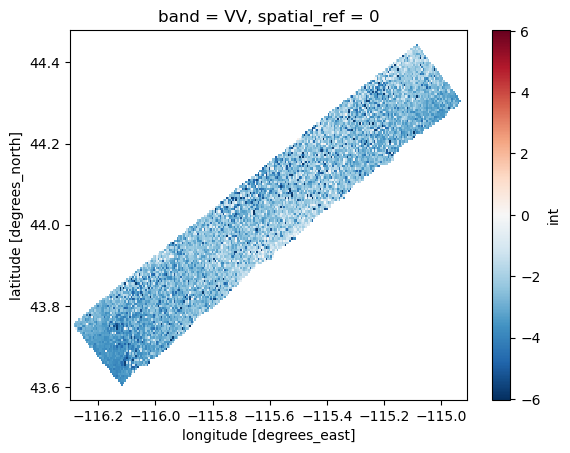

In [19]:
ds['int'].sel(band = 'VV')[::100,::100].plot()